In [1]:
#Estadistica Aplicada III
#Proyecto !
#Luis Edmundo Gatica Norato, CU: 150703

In [2]:
from matplotlib import pyplot
from matplotlib.widgets import Slider
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
X = np.zeros((2091,32256))
y = np.zeros((2091))
wm = [5, 15, 22, 24, 27, 28, 32, 34, 37]

In [4]:
for j in range (1,40):
    if(j!=14):
        if(j<10):
            path = "/Users/mundogn/Documents/Estadistica-III-Proy1/CroppedYale_3/yaleB0"+str(j)+"/"
        else:
            path = "/Users/mundogn/Documents/Estadistica-III-Proy1/CroppedYale_3/yaleB"+str(j)+"/"
        for i in range(1,56):
            im = Image.open(path+str(i)+".pgm")
            aux = np.asarray(im.getdata())
            aux = np.transpose(aux)
            if(j<14):
                X[(j-1)*55+i-1] = aux
                y[(j-1)*55+i-1]=j
            else:
                X[(j-2)*55+i-1] = aux
                y[(j-2)*55+i-1]=j
    

In [4]:
X[1000]

array([110., 110., 109., ...,  14.,  15.,  13.])

In [ ]:
X[2085]

array([4., 4., 4., ..., 4., 1., 2.])

In [5]:
X_hat = X.mean(axis=0)
len(X_hat)
X = X - X_hat

In [6]:
pca = PCA(n_components = 15)
principalComponents = pca.fit_transform(X)

In [7]:
np.sum(pca.explained_variance_ratio_)

0.8749444454629942

In [8]:
principalDf = pd.DataFrame(data = pca.explained_variance_ratio_
             , columns = ['Varianza explicada por componente'])
principalDf.head(5)

,Varianza explicada por componente
0,0.407912
1,0.291822
2,0.055247
3,0.027917
4,0.016775


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(principalComponents,y,test_size=0.25,random_state=40)


model = LogisticRegression(solver='lbfgs',max_iter=2000,multi_class='auto')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
parameters = model.coef_
accuracy

/Users/mundogn/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.722753346080306

In [22]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 0,  0,  0, ...,  0,  1,  0],
       [ 0, 10,  0, ...,  1,  0,  0],
       [ 0,  0,  9, ...,  0,  0,  0],
       ...,
       [ 0,  1,  0, ...,  8,  0,  0],
       [ 0,  0,  0, ...,  1, 10,  0],
       [ 0,  0,  0, ...,  0,  0, 13]])

In [23]:
y_test

array([35., 29., 16., 33., 35.,  7., 13., 38., 27., 30., 16.,  8., 28.,
        8., 16., 38., 13., 29., 12., 35., 19., 21., 36., 38., 25., 24.,
        7.,  1., 10., 34., 21., 12., 33., 11., 38., 26., 16., 17., 26.,
       32., 33., 20., 38., 13.,  4., 25.,  7., 37., 21.,  5., 10., 35.,
       38.,  1., 35., 27., 28., 16.,  6., 10.,  2.,  2., 37., 12., 13.,
       15., 34., 30.,  6., 17., 30.,  4., 21., 12., 26., 25., 27., 33.,
       15., 23., 24., 28., 15.,  4., 12., 25., 31., 26., 15., 39., 24.,
       27., 26., 36., 26., 24., 24., 23., 21., 15., 39., 21., 11., 22.,
       18.,  8., 25., 12., 33., 15., 22., 23., 35.,  1.,  3., 24., 18.,
       28., 13.,  4., 23., 29., 32., 30., 10., 33.,  8., 34., 17., 30.,
       17., 19., 31., 37., 28.,  3., 39., 23.,  9., 35., 33., 32.,  9.,
        4.,  7.,  8.,  6., 15., 24.,  5., 16., 39., 26.,  3., 11.,  5.,
       38.,  8., 34., 37., 12., 34., 39., 24., 12., 36., 15., 17., 12.,
       35., 13., 23., 18., 28.,  1., 24., 35., 25., 21.,  6., 17

In [24]:
np.shape(cnf_matrix)

(39, 39)

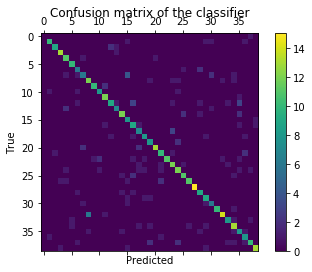

In [25]:
labels = list(range(39))
#print(cnf_matrix)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cnf_matrix)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
#ax.set_xticklabels([''] + labels)
#ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()